In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

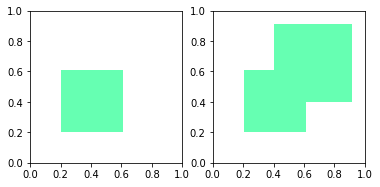

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.892160 [    0/10000]
loss: 0.560819 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 62.2%
 Avg loss: 0.008776 

Epoch 2
-------------------------------
loss: 0.538779 [    0/10000]
loss: 0.556006 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 58.1%
 Avg loss: 0.008540 

Epoch 3
-------------------------------
loss: 0.515316 [    0/10000]
loss: 0.555774 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 60.4%
 Avg loss: 0.008455 

Epoch 4
-------------------------------
loss: 0.511313 [    0/10000]
loss: 0.554500 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 65.2%
 Avg loss: 0.008238 

Epoch 5
-------------------------------
loss: 0.501892 [    0/10000]
loss: 0.540905 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 74.3%
 Avg loss: 0.007726 

Epoch 6
-------------------------------
loss: 0.471434 [    0/10000]
loss: 0.490352 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 82.4%
 Avg loss: 0.006865 

Epoch 7
-------------------------------
loss: 0.413092 [  

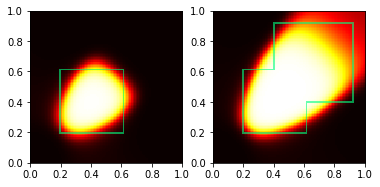

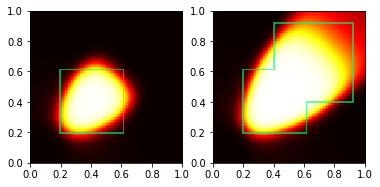

In [4]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(50)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.661657 [    0/10000]
loss: 0.537880 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.6%
 Avg loss: 0.008929 

Epoch 2
-------------------------------
loss: 0.516355 [    0/10000]
loss: 0.526607 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 60.1%
 Avg loss: 0.008303 

Epoch 3
-------------------------------
loss: 0.488238 [    0/10000]
loss: 0.495721 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 63.1%
 Avg loss: 0.007969 

Epoch 4
-------------------------------
loss: 0.477895 [    0/10000]
loss: 0.477571 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 60.0%
 Avg loss: 0.007763 

Epoch 5
-------------------------------
loss: 0.471537 [    0/10000]
loss: 0.449301 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.6%
 Avg loss: 0.007451 

Epoch 6
-------------------------------
loss: 0.459851 [    0/10000]
loss: 0.416498 [ 6400/10000]
Test Error: 
 Accuracy: 82.7%, 61.2%
 Avg loss: 0.007101 

Epoch 7
-------------------------------
loss: 0.454554 [  

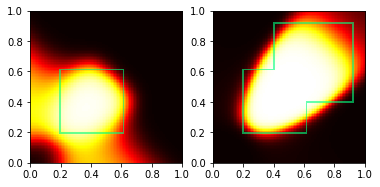

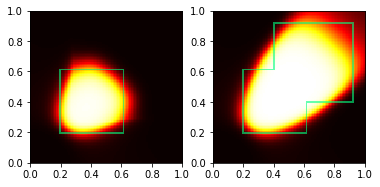

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50)
#experiment.save(dir='./models/')